## State of the Union (2009-2022): Sentiment Analysis

By: Shirsho Dasgupta (2022)

#### Notes: 

The code reads the text of every State of the Union speech from 2009 to 2022 and performs sentiment analysis on them using the NRC Word-Emotion Association Lexicon (EmoLex). 

The NRC Emotion Lexicon is a list of English words and their associations with eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive). The annotations were manually done by crowdsourcing.

The code matches the words in the speeches to that of the dictionary then adds up the factor of the emotion. 

Since EmoLex is, at the end of the day, crowdsourced and finite, there might be some words which are outside its scope or some nuances which are not accounted for (the code performs word-to-word comparison). The analysis is always at best an approximation. 

#### Sources:

State of the Union Archived Speeches at University of California, Santa Barbara: https://www.presidency.ucsb.edu/documents/presidential-documents-archive-guidebook/annual-messages-congress-the-state-the-union

NRC Emotion Lexicon: http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm

### Importing libraries

In [1]:
import pandas as pd
%matplotlib inline

### Creating dataframe of speeches

#### Importing SOTU speeches

In [2]:
import glob

filenames = glob.glob("sotu/*")

In [3]:
speeches = [open(filename).read() for filename in filenames]
len(speeches)

14

#### Storing SOTU speeches in one dataframe

In [4]:
### stores entire text of speech under one column and the associated filename under another
speeches_df = pd.DataFrame({"text": speeches, "filename": filenames})
speeches_df.head(3)

,text,filename
0,"Madam Speaker, Madam Vice President—no Preside...",sotu/04-28-2021.txt
1,"Madam Speaker, Vice President Biden, Members o...",sotu/01-27-2010.txt
2,"Mr. Speaker, Mr. Vice President, Members of Co...",sotu/01-12-2016.txt


In [5]:
### creates two new columns to store year and name of president
speeches_df["year"] = " "
speeches_df["pres"] = " "

### loop runs through dataframe
for i in range(0, len(speeches_df)):
    
    ### extracts (from filename) and stores year of speech
    speeches_df["year"][i] = int(speeches_df["filename"][i][-8:-4])
    x = speeches_df["year"][i]
    
    ### condition checks what year the speech was delivered and stores the name of the president accordingly
    if (x >= 2009) & (x <= 2016):
        speeches_df["pres"][i] = "obama"
    elif (x >= 2017) & (x <= 2020):
        speeches_df["pres"][i] = "trump"
    elif (x > 2020):
        speeches_df["pres"][i] = "biden"

In [6]:
### displays final master dataframe
speeches_df

,text,filename,year,pres
0,"Madam Speaker, Madam Vice President—no Preside...",sotu/04-28-2021.txt,2021,biden
1,"Madam Speaker, Vice President Biden, Members o...",sotu/01-27-2010.txt,2010,obama
2,"Mr. Speaker, Mr. Vice President, Members of Co...",sotu/01-12-2016.txt,2016,obama
3,"Madam Speaker, Mr. Vice President, Members of ...",sotu/02-24-2009.txt,2009,obama
4,"Mr. Speaker, Mr. Vice President, Members of Co...",sotu/01-20-2015.txt,2015,obama
5,"Mr. Speaker, Mr. Vice President, Members of Co...",sotu/02-12-2013.txt,2013,obama
6,"Thank you very much. Mr. Speaker, Mr. Vice Pre...",sotu/02-28-2017.txt,2017,trump
7,"Mr. Speaker, Mr. Vice President, Members of Co...",sotu/02-05-2019.txt,2019,trump
8,"Mr. Speaker, Mr. Vice President, Members of Co...",sotu/01-25-2011.txt,2011,obama
9,"Madam Speaker, Mr. Vice President, Members of ...",sotu/02-04-2020.txt,2020,trump


#### Creating separate dataframes for each president

In [7]:
### filters by name of president and stores in separate dataframes
speeches_df_obama = speeches_df[speeches_df["pres"] == "obama"] 
speeches_df_trump = speeches_df[speeches_df["pres"] == "trump"] 
speeches_df_biden = speeches_df[speeches_df["pres"] == "biden"] 

### Sentiment analysis

#### Importing NRC Emotion Lexicon

Download compressed file from http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm

Move the relevant text-file to the directory

In [8]:
filepath = "NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names = ["word", "emotion", "association"], sep = "\t", keep_default_na = False)
emolex_df = emolex_df.pivot(index = "word", columns = "emotion", values = "association").reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


#### Calculating share of words using TfidfVectorizer

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(vocabulary = emolex_df.word, use_idf = False, norm = "l1") 
matrix = vec.fit_transform(speeches_df.text)
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns = vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00105,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


#### Applying EmoLex

The words which appear per category in the NRC Emotion Lexicon dictionary are identified and their shares are added up. The sum gives the total share of the document that relates to a particular emotion or sentiment. For instance say a document has two "angry" words each making up 0.01 of the text, then the anger-factor as it were of the text is 0.02 (= 0.01 + 0.01). 

In [10]:
### identifies all negative words
neg_words = emolex_df[emolex_df.negative == 1]["word"]
### adds up shares of negative words
speeches_df["negative"] = wordcount_df[neg_words].sum(axis = 1)

### the above process is repeated per sentiment

pos_words = emolex_df[emolex_df.positive == 1]["word"]
speeches_df["positive"] = wordcount_df[pos_words].sum(axis = 1)

angry_words = emolex_df[emolex_df.anger == 1]["word"]
speeches_df["anger"] = wordcount_df[angry_words].sum(axis = 1)

anticip_words = emolex_df[emolex_df.anticipation == 1]["word"]
speeches_df["anticipation"] = wordcount_df[anticip_words].sum(axis = 1)

disgust_words = emolex_df[emolex_df.disgust == 1]["word"]
speeches_df["disgust"] = wordcount_df[disgust_words].sum(axis = 1)

fear_words = emolex_df[emolex_df.fear == 1]["word"]
speeches_df["fear"] = wordcount_df[fear_words].sum(axis = 1)

joy_words = emolex_df[emolex_df.joy == 1]["word"]
speeches_df["joy"] = wordcount_df[joy_words].sum(axis = 1)

sad_words = emolex_df[emolex_df.sadness == 1]["word"]
speeches_df["sadness"] = wordcount_df[sad_words].sum(axis = 1)

surprise_words = emolex_df[emolex_df.surprise == 1]["word"]
speeches_df["surprise"] = wordcount_df[surprise_words].sum(axis = 1)

trust_words = emolex_df[emolex_df.trust == 1]["word"]
speeches_df["trust"] = wordcount_df[trust_words].sum(axis = 1)

In [11]:
### displays final dataframe
speeches_df.head()

,text,filename,year,pres,negative,positive,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,"Madam Speaker, Madam Vice President—no Preside...",sotu/04-28-2021.txt,2021,biden,0.132283,0.266142,0.058268,0.114961,0.034646,0.087664,0.080315,0.061942,0.039370,0.167454
1,"Madam Speaker, Vice President Biden, Members o...",sotu/01-27-2010.txt,2010,obama,0.141074,0.241997,0.056430,0.102550,0.038524,0.083017,0.083559,0.066196,0.039067,0.167119
2,"Mr. Speaker, Mr. Vice President, Members of Co...",sotu/01-12-2016.txt,2016,obama,0.119947,0.273028,0.074884,0.111332,0.031809,0.098078,0.098078,0.065606,0.054341,0.184228
3,"Madam Speaker, Mr. Vice President, Members of ...",sotu/02-24-2009.txt,2009,obama,0.133794,0.238065,0.052764,0.108668,0.042085,0.081658,0.067839,0.059673,0.029523,0.175251
4,"Mr. Speaker, Mr. Vice President, Members of Co...",sotu/01-20-2015.txt,2015,obama,0.111111,0.254831,0.052536,0.115338,0.035628,0.073671,0.076087,0.048913,0.048913,0.162440


#### Exporting the dataset

In [12]:
speeches_df.to_csv("sotu_analysis.csv", index = False)

#### Plotting the data

##### Negativity by year

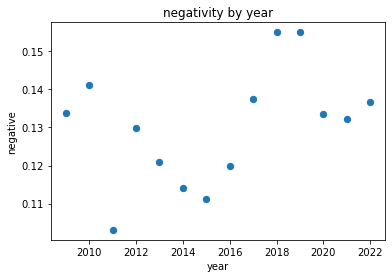

In [13]:
speeches_df.plot(title = "negativity by year", x = "year", y = "negative", kind = "scatter", s = 40)

##### Positivity by year

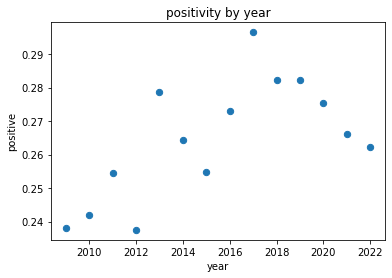

In [14]:
speeches_df.plot(title = "positivity by year", x = "year", y = "positive", kind = "scatter", s = 40)

##### Anger by year

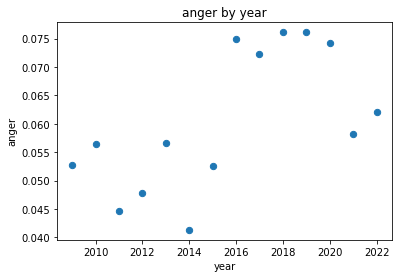

In [15]:
speeches_df.plot(title = "anger by year", x = "year", y = "anger", kind = "scatter", s = 40)

#### Note: 
The same plots can be drawn with other variables like positivity vs. negativity, anger vs. fear and so on. 